# Choropleth Mapping 



## Introduction

When PySAL was originally planned, the intention was to focus on the computational aspects of exploratory spatial data analysis and spatial econometric methods, while relying on existing GIS packages and visualization libraries for visualization of computations. Indeed, we have partnered with [esri](https://geodacenter.asu.edu/arc_pysal) and [QGIS](http://planet.qgis.org/planet/tag/pysal/ ) towards this end.

However, over time we have received many requests for supporting basic geovisualization within PySAL so that the step of having to interoperate with an exertnal package can be avoided, thereby increasing the efficiency of the spatial analytical workflow.

In this notebook, we demonstrate several approaches towards a particular subset of geovisualization methods, namely **choropleth maps**. We start with  a self-contained exploratory workflow where no other dependencies beyond PySAL are required. The idea here is to support quick generation of different views of your data to complement the statistical and econometric work in PySAL. Once your work has progressed to the publication stage, we point you to resources that can be used for publication quality output.

We then move on to consider three other packages that can be used in conjunction with PySAL for choropleth mapping:

- geopandas
- folium
- cartopy
- bokeh





## PySAL Viz Module

The  mapping module in PySAL is organized around three main layers:

- A lower-level layer that reads polygon, line and point shapefiles and returns a Matplotlib collection.
- A medium-level layer that performs some usual transformations on a Matplotlib object (e.g. color code polygons according to a vector of values).
- A higher-level layer intended for end-users for particularly useful cases and style preferences pre-defined (e.g. Create a choropleth).

In [1]:
%matplotlib inline
import numpy as np
import pysal as ps
import random as rdm
from pysal.contrib.viz import mapping as maps
from pylab import *

### Lower-level component

This includes basic functionality to read spatial data from a file (currently only shapefiles supported) and produce rudimentary Matplotlib objects. The main methods are:

- map_poly_shape: to read in polygon shapefiles
- map_line_shape: to read in line shapefiles
- map_point_shape: to read in point shapefiles

These methods all support an option to subset the observations to be plotted (very useful when missing values are present). They can also be overlaid and combined by using the `setup_ax` function. the resulting object is very basic but also very flexible so, for minds used to matplotlib this should be good news as it allows to modify pretty much any property and attribute.

#### Example

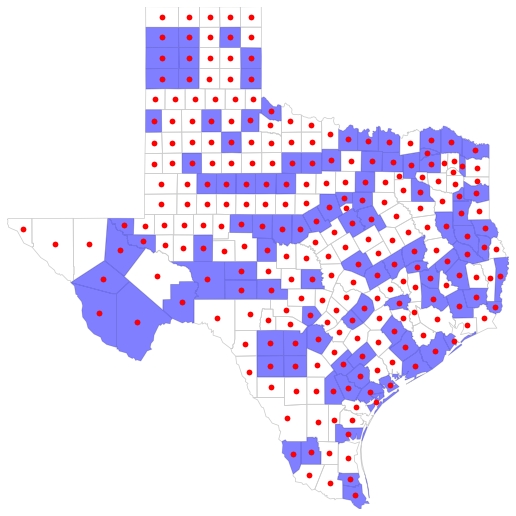

In [2]:
shp_link = 'data/texas.shp'
shp = ps.open(shp_link)
some = [bool(rdm.getrandbits(1)) for i in ps.open(shp_link)]

fig = figure(figsize=(9,9))

base = maps.map_poly_shp(shp)
base.set_facecolor('none')
base.set_linewidth(0.75)
base.set_edgecolor('0.8')
some = maps.map_poly_shp(shp, which=some)
some.set_alpha(0.5)
some.set_linewidth(0.)
cents = np.array([poly.centroid for poly in ps.open(shp_link)])
pts = scatter(cents[:, 0], cents[:, 1])
pts.set_color('red')

ax = maps.setup_ax([base, some, pts], [shp.bbox, shp.bbox, shp.bbox])
fig.add_axes(ax)
show()

### Medium-level component

This layer comprises functions that perform usual transformations on matplotlib objects, such as color coding objects (points, polygons, etc.) according to a series of values. This includes the following methods:

- `base_choropleth_classless`
- `base_choropleth_unique`
- `base_choropleth_classif`

#### Example

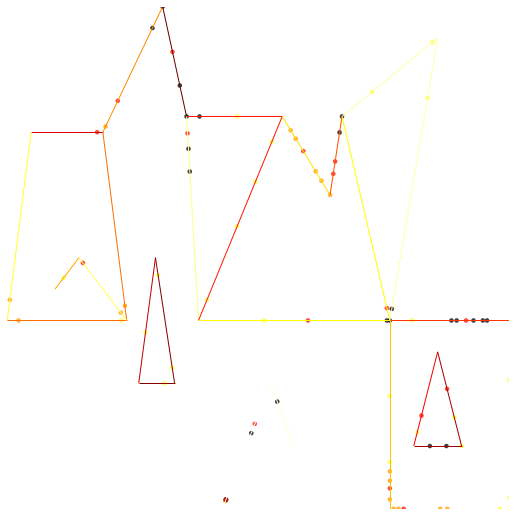

In [3]:
net_link = ps.examples.get_path('eberly_net.shp')
net = ps.open(net_link)
values = np.array(ps.open(net_link.replace('.shp', '.dbf')).by_col('TNODE'))

pts_link = ps.examples.get_path('eberly_net_pts_onnetwork.shp')
pts = ps.open(pts_link)

fig = figure(figsize=(9,9))

netm = maps.map_line_shp(net)
netc = maps.base_choropleth_unique(netm, values)

ptsm = maps.map_point_shp(pts)
ptsm = maps.base_choropleth_classif(ptsm, values)
ptsm.set_alpha(0.5)
ptsm.set_linewidth(0.)

ax = maps.setup_ax([netc, ptsm], [net.bbox, net.bbox])
fig.add_axes(ax)
show()

calling plt.show()


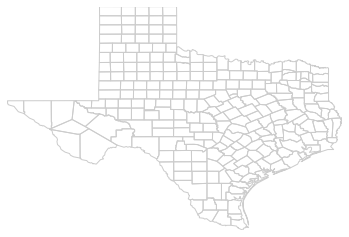

In [4]:
maps.plot_poly_lines('data/texas.shp')

### Higher-level component

This currently includes the following end-user functions:

- `plot_poly_lines`: very quick shapfile plotting

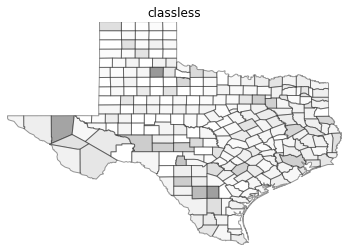

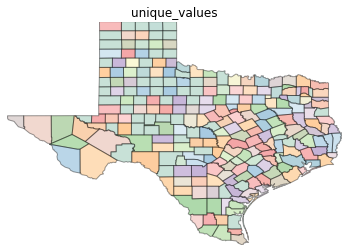

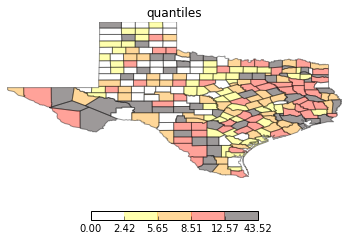

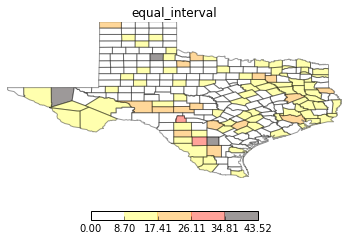

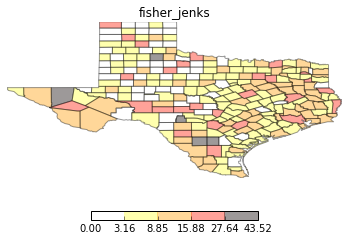

In [5]:
shp_link = 'data/texas.shp'
values = np.array(ps.open('data/texas.dbf').by_col('HR90'))

types = ['classless', 'unique_values', 'quantiles', 'equal_interval', 'fisher_jenks']
for typ in types:
    maps.plot_choropleth(shp_link, values, typ, title=typ)

### PySAL Map Classifiers

In [6]:
hr90 = values
hr90q5 = ps.Quantiles(hr90, k=5)
hr90q5

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  2.421               51
 2.421 < x[i] <=  5.652               51
 5.652 < x[i] <=  8.510               50
 8.510 < x[i] <= 12.571               51
12.571 < x[i] <= 43.516               51

In [7]:
hr90q4 = ps.Quantiles(hr90, k=4)
hr90q4

               Quantiles                
 
Lower            Upper             Count
         x[i] <=  3.918               64
 3.918 < x[i] <=  7.232               63
 7.232 < x[i] <= 11.414               63
11.414 < x[i] <= 43.516               64

In [8]:
hr90e5 = ps.Equal_Interval(hr90, k=5)
hr90e5

              Equal Interval             
 
Lower            Upper              Count
         x[i] <=  8.703               157
 8.703 < x[i] <= 17.406                76
17.406 < x[i] <= 26.110                16
26.110 < x[i] <= 34.813                 2
34.813 < x[i] <= 43.516                 3

In [9]:
hr90fj5 = ps.Fisher_Jenks(hr90, k=5)
hr90fj5

               Fisher_Jenks              
 
Lower            Upper              Count
         x[i] <=  3.156                55
 3.156 < x[i] <=  8.846               104
 8.846 < x[i] <= 15.881                64
15.881 < x[i] <= 27.640                27
27.640 < x[i] <= 43.516                 4

In [10]:
hr90fj5.adcm # measure of fit: Absolute deviation around class means

352.10763138100003

In [11]:
hr90q5.adcm

361.5413784392

In [12]:
hr90e5.adcm

614.51093704210064

In [13]:
hr90fj5.yb[0:10] # what bin each value is placed in

array([0, 0, 3, 0, 1, 0, 0, 0, 0, 1])

In [14]:
hr90fj5.bins # upper bounds of each bin

array([  3.15613527,   8.84642604,  15.88088069,  27.63957988,  43.51610096])

## GeoPandas

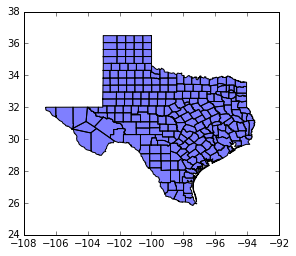

In [15]:
import geopandas as gpd
shp_link = "data/texas.shp"
tx = gpd.read_file(shp_link)
tx.plot(color='blue')

In [16]:
type(tx)

geopandas.geodataframe.GeoDataFrame

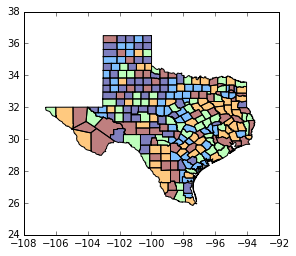

In [17]:
tx.plot(column='HR90', scheme='QUANTILES') # uses pysal classifier under the hood

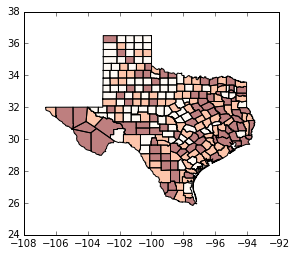

In [18]:
tx.plot(column='HR90', scheme='QUANTILES', k=3, cmap='OrRd') # we need a continuous color map

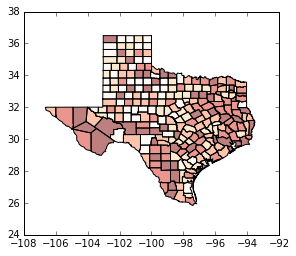

In [19]:
tx.plot(column='HR90', scheme='QUANTILES', k=5, cmap='OrRd') # bump up to quintiles

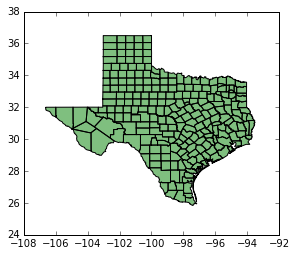

In [20]:
tx.plot(color='green') # explore options, polygon fills

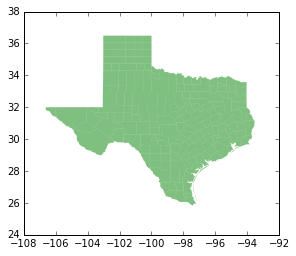

In [21]:
tx.plot(color='green',linewidth=0) # border

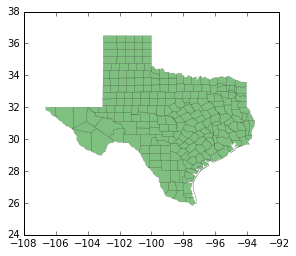

In [22]:
tx.plot(color='green',linewidth=0.1) # border

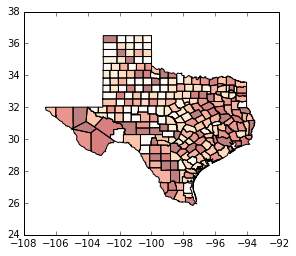

In [23]:
tx.plot(column='HR90', scheme='QUANTILES', k=9, cmap='OrRd') # now with qunatiles

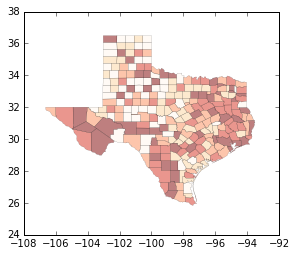

In [24]:
tx.plot(column='HR90', scheme='QUANTILES', k=5, cmap='OrRd', linewidth=0.1)

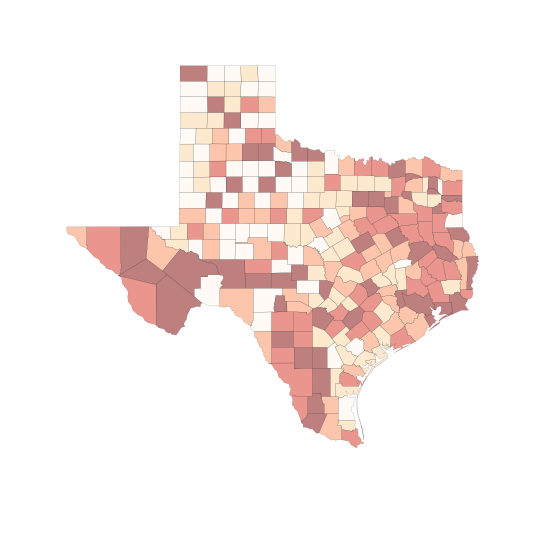

In [25]:
import matplotlib.pyplot as plt # make plot larger

f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='QUANTILES', k=5, cmap='OrRd', linewidth=0.1, ax=ax)
ax.set_axis_off()
plt.show()

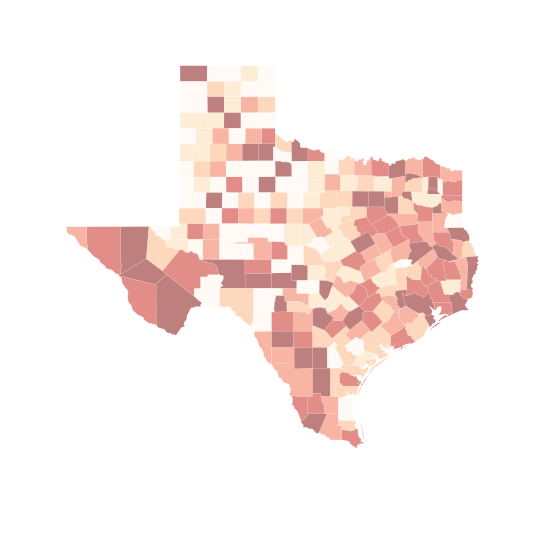

In [26]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='QUANTILES', \
        k=6, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white')
ax.set_axis_off()
plt.show()

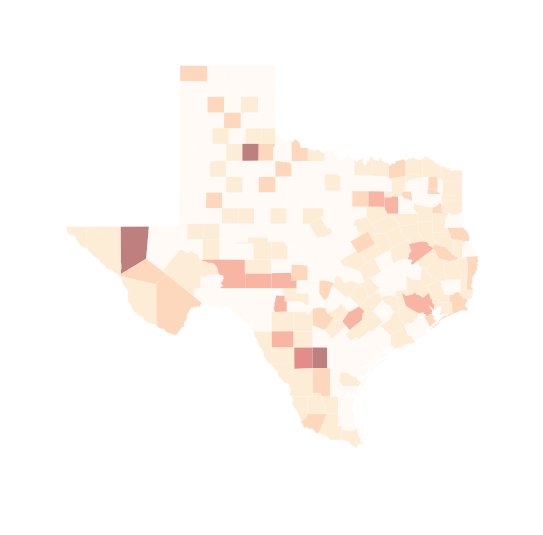

In [27]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='equal_interval', \
        k=6, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white')
ax.set_axis_off()
plt.show()

/home/serge/anaconda2/envs/gds/lib/python2.7/site-packages/geopandas/geodataframe.py:447: UserWarning: Invalid k: 10 (2 <= k <= 9), setting k=5 (default)
  return plot_dataframe(self, *args, **kwargs)


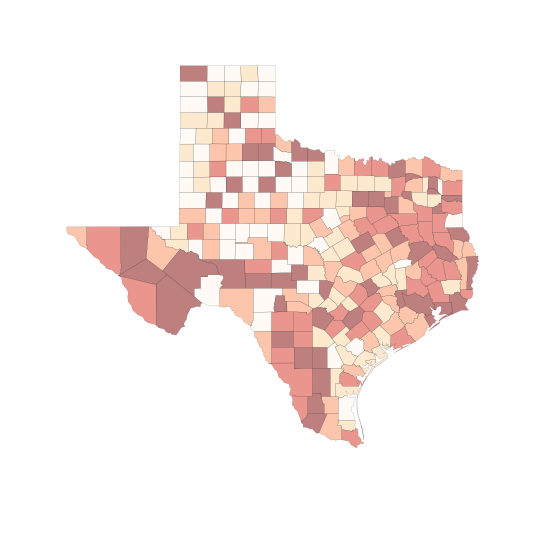

In [28]:
# try deciles
f, ax = plt.subplots(1, figsize=(9, 9))
tx.plot(column='HR90', scheme='QUANTILES', k=10, cmap='OrRd', linewidth=0.1, ax=ax)
ax.set_axis_off()
plt.show()

In [29]:
# ok, let's work around to get deciles
q10 = ps.Quantiles(tx.HR90,k=10)
q10.bins

array([  0.        ,   2.42057708,   4.59760916,   5.6524773 ,
         7.23234613,   8.50963716,  10.30447074,  12.57143011,
        16.6916767 ,  43.51610096])

In [30]:
q10.yb

array([0, 0, 9, 0, 2, 0, 0, 2, 0, 3, 9, 3, 6, 4, 0, 2, 8, 0, 0, 2, 0, 2, 5,
       0, 7, 6, 4, 9, 9, 8, 5, 4, 1, 3, 0, 8, 0, 4, 7, 7, 6, 5, 8, 0, 0, 0,
       6, 2, 3, 9, 0, 0, 5, 8, 6, 3, 3, 6, 2, 8, 0, 0, 2, 0, 8, 2, 8, 0, 3,
       0, 4, 0, 7, 9, 2, 3, 3, 8, 9, 5, 8, 0, 4, 0, 4, 0, 8, 2, 0, 2, 8, 9,
       4, 6, 6, 8, 4, 3, 6, 7, 7, 5, 6, 3, 0, 4, 4, 1, 6, 0, 6, 7, 4, 6, 5,
       4, 6, 0, 0, 5, 0, 2, 7, 0, 2, 2, 7, 2, 8, 9, 4, 0, 7, 5, 9, 8, 7, 5,
       0, 3, 5, 3, 5, 0, 5, 0, 5, 4, 9, 7, 0, 8, 5, 0, 4, 3, 6, 8, 4, 7, 9,
       5, 6, 5, 9, 0, 7, 0, 9, 6, 4, 4, 2, 9, 2, 2, 7, 3, 2, 9, 9, 8, 0, 6,
       5, 7, 8, 2, 0, 9, 7, 7, 4, 3, 0, 4, 5, 8, 7, 8, 6, 9, 2, 5, 9, 2, 2,
       3, 4, 8, 6, 5, 9, 9, 6, 7, 5, 7, 0, 4, 8, 6, 6, 3, 3, 7, 3, 4, 9, 7,
       5, 0, 0, 3, 9, 9, 6, 2, 3, 6, 4, 3, 9, 3, 6, 3, 8, 7, 5, 0, 8, 5, 3,
       7])

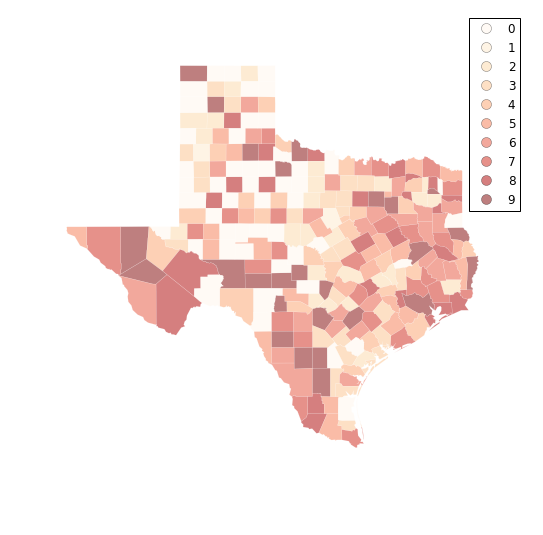

In [31]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=q10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

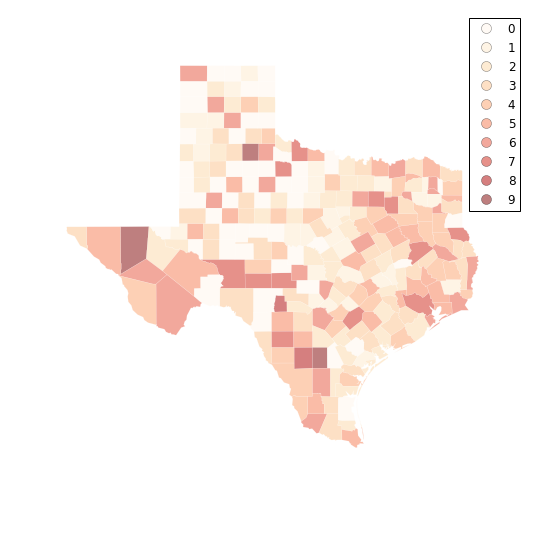

In [32]:
fj10 = ps.Fisher_Jenks(tx.HR90,k=10)
fj10.bins
#labels = ["%0.1f"%l for l in fj10.bins]
#labels
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=fj10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [33]:
fj10.adcm

133.99950285589998

In [34]:
q10.adcm

220.80434598560004

In [35]:
q5 = ps.Quantiles(tx.HR90,k=5)


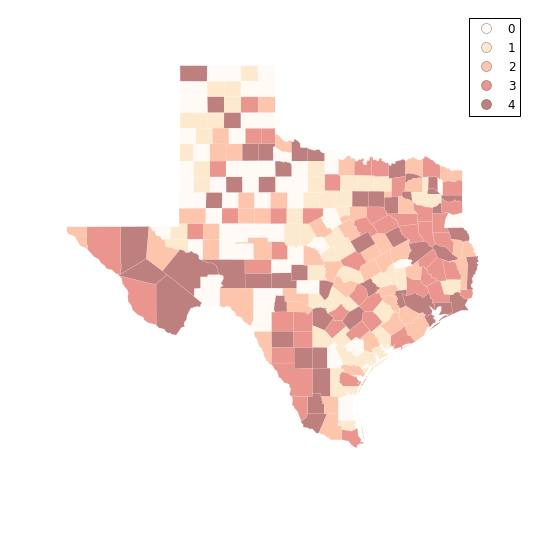

In [36]:
f, ax = plt.subplots(1, figsize=(9, 9))
tx.assign(cl=q5.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

## Folium

In addition to using matplotlib, the viz module includes components that interface with the [folium](http://folium.readthedocs.io/en/latest/) library which provides a Pythonic way to generate [Leaflet](http://leafletjs.com/) maps.


In [37]:
import pysal as ps
import geojson as gj
from pysal.contrib.viz import folium_mapping as fm

First, we need to convert the data into a JSON format. JSON, short for "Javascript Serialized Object Notation," is a simple and effective way to represent objects in a digital environment. For geographic information, the [GeoJSON](https://geojson.org) standard defines how to represent geographic information in JSON format. Python programmers may be more comfortable thinking of JSON data as something akin to a standard Python dictionary. 

In [38]:
filepath = 'data/texas.shp'[:-4]
shp = ps.open(filepath + '.shp')
dbf = ps.open(filepath + '.dbf')

In [39]:
js = fm.build_features(shp, dbf)

Just to show, this constructs a dictionary with the following keys:

In [40]:
js.keys()

[u'type', 'bbox', 'features']

In [41]:
js.type

'FeatureCollection'

In [42]:
js.bbox

[-106.6495132446289, 25.845197677612305, -93.50721740722656, 36.49387741088867]

In [43]:
js.features[0]

{"bbox": [-100.5494155883789, 36.05754852294922, -99.99715423583984, 36.49387741088867], "geometry": {"coordinates": [[[-100.00686645507812, 36.49387741088867], [-100.00114440917969, 36.49251937866211], [-99.99715423583984, 36.05754852294922], [-100.54059600830078, 36.058135986328125], [-100.5494155883789, 36.48944854736328], [-100.00686645507812, 36.49387741088867]]], "type": "Polygon"}, "properties": {"BLK60": 0.029359953, "BLK70": 0.0286861733, "BLK80": 0.0265533723, "BLK90": 0.0318167356, "CNTY_FIPS": "295", "COFIPS": 295, "DNL60": 1.293817423, "DNL70": 1.3170337879, "DNL80": 1.3953635084, "DNL90": 1.2153856529, "DV60": 1.4948859166, "DV70": 2.2709475333, "DV80": 3.5164835165, "DV90": 6.1016949153, "FH60": 6.7245119306, "FH70": 4.5, "FH80": 3.8353601497, "FH90": 6.0935799782, "FIPS": "48295", "FIPSNO": 48295, "FP59": 22.4, "FP69": 12.1, "FP79": 10.851262862, "FP89": 9.1403699674, "GI59": 0.2869290401, "GI69": 0.378218563, "GI79": 0.4070049836, "GI89": 0.3730049522, "HC60": 0.0, "HC

Then, we write the json to a file:

In [44]:
with open('./example.json', 'w') as out:
    gj.dump(js, out)

### Mapping
Let's look at the columns that we are going to map.

In [45]:
list(js.features[0].properties.keys())[:5]

[u'HR90', u'PS90', u'FH80', u'HC60', u'FP79']

We can map these attributes by calling them as arguments to the choropleth mapping function:

In [46]:
fm.choropleth_map?

In [47]:
# folium maps have been turned off for creating gitbook. 
# to run them, uncomment.
fm.choropleth_map('./example.json', 'FIPS', 'HR90',zoom_start=6)

AttributeError: 'Map' object has no attribute 'geo_json'

This produces a map using default classifications and color schemes and saves it to an html file. We set the function to have sane defaults. However, if the user wants to have more control, we have many options available. 

There are arguments to change the classification scheme:

In [48]:
# folium maps have been turned off for creating gitbook. 
# to run them, uncomment.
fm.choropleth_map('./example.json', 'FIPS', 'HR90', classification = 'Quantiles',classes=4)

AttributeError: 'Map' object has no attribute 'geo_json'

Most PySAL classifiers are supported.

### Base Map Type



In [49]:
# folium maps have been turned off for creating gitbook. 
# to run them, uncomment.
fm.choropleth_map('./example.json', 'FIPS', 'HR90', classification = 'Jenks Caspall', \
                  tiles='Stamen Toner',zoom_start=6, save=True) 

AttributeError: 'Map' object has no attribute 'geo_json'

We support the entire range of builtin basemap types in Folium, but custom tilesets from MapBox are not supported (yet).
 
### Color Scheme

In [50]:
# folium maps have been turned off for creating gitbook. 
# to run them, uncomment.

fm.choropleth_map('./example.json', 'FIPS', 'HR80', classification = 'Jenks Caspall', \
                 tiles='Stamen Toner', fill_color = 'PuBuGn', save=True) 

AttributeError: 'Map' object has no attribute 'geo_json'

All color schemes are [Color Brewer](http://colorbrewer2.org) and simply pass through to `Folium` on execution. 

Folium supports up to 6 classes.

## Cartopy

Next we turn to [cartopy](http://scitools.org.uk/cartopy/).

In [51]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

reader = shpreader.Reader("data/texas.shp")

In [52]:
def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    if title:
        plt.title(title)
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    
    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        #facecolor = 'red'
        edgecolor = 'black'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    plt.show()

In [53]:
HR90 = values

In [54]:
bins_q5 = ps.Quantiles(HR90, k=5)

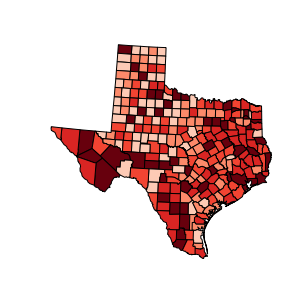

In [55]:
bwr = plt.cm.get_cmap('Reds')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
classes = bins_q5.yb
choropleth(classes, c5, reader)

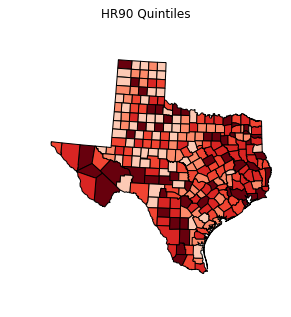

In [56]:
choropleth(classes, c5, reader, title="HR90 Quintiles")

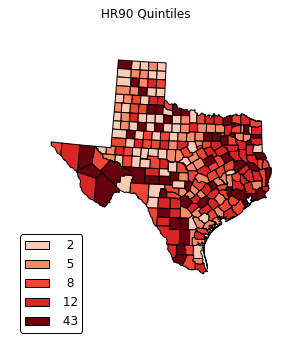

In [57]:
legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="HR90 Quintiles")

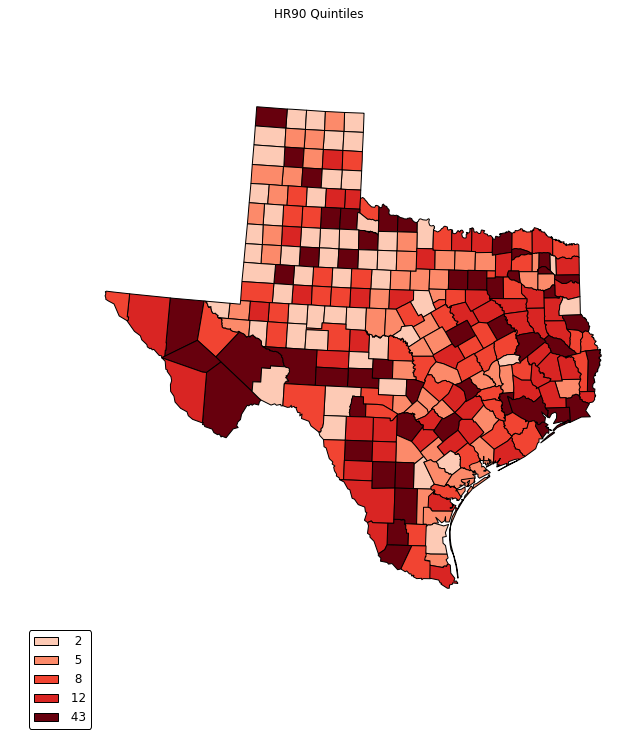

In [58]:
def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    f, ax = plt.subplots(1, figsize=(9,9))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axison=False
    
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    if title:
        plt.title(title)
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        #facecolor = 'red'
        edgecolor = 'black'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
    
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    #ax.set_axis_off()
    plt.show()

legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="HR90 Quintiles")

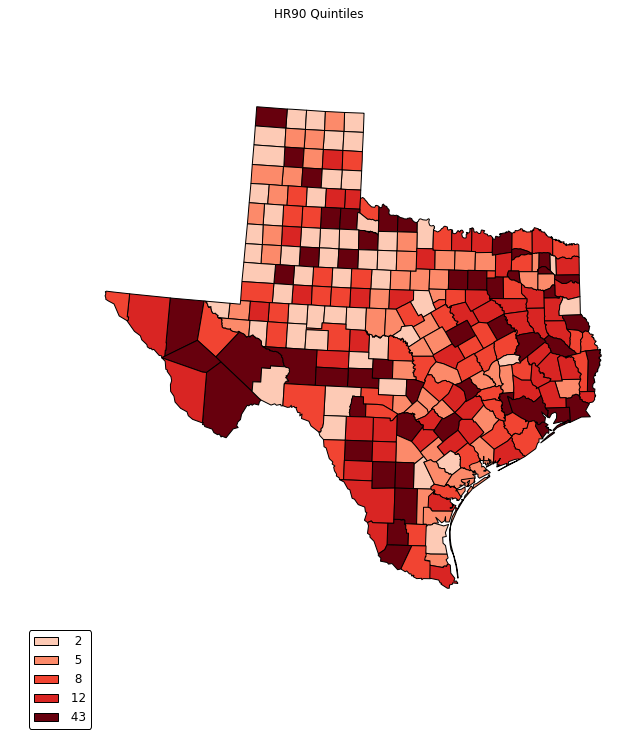

In [59]:
legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="HR90 Quintiles")

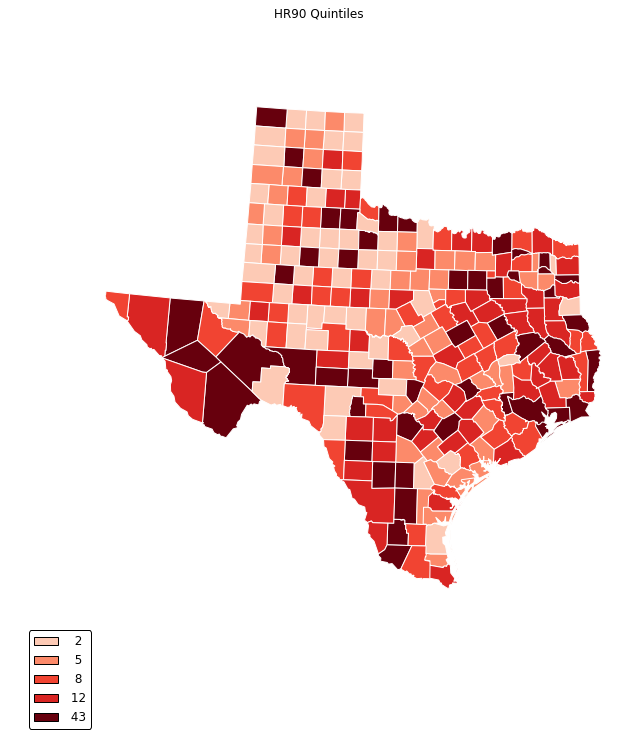

In [60]:
def choropleth(classes, colors, reader, legend=None, title=None, fileName=None, dpi=600):
    f, ax = plt.subplots(1, figsize=(9,9), frameon=False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axison=False
    
    
    ax = plt.axes([0,0,1,1], projection=ccrs.LambertConformal())
    ax.set_extent([-108, -93, 38, 24], ccrs.Geodetic())
    ax.background_patch.set_visible(False)
    ax.outline_patch.set_visible(False)
    
    if title:
        plt.title(title)

    for i,state in enumerate(reader.geometries()):
        facecolor = colors[classes[i]]
        edgecolor = 'white'
        ax.add_geometries([state], ccrs.PlateCarree(), 
                         facecolor=facecolor, edgecolor=edgecolor)
    
        
    leg = [ mpatches.Rectangle((0,0),1,1, facecolor=color) for color in colors]
    if legend:
        plt.legend(leg, legend, loc='lower left', bbox_to_anchor=(0.025, -0.1), fancybox=True)
    if fileName:
        plt.savefig(fileName, dpi=dpi)
    plt.show()

legend =[ "%3d"%ub for ub in bins_q5.bins]
choropleth(classes, c5, reader, legend, title="HR90 Quintiles")

For an example publication and code where Cartopy was used for the mapping see: [Rey (2016)](https://github.com/sjsrey/limaaag).

## Bokeh

[website](http://bokeh.pydata.org/en/latest/)

In [61]:
from collections import OrderedDict

#from bokeh.sampledata import us_counties, unemployment
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.models import HoverTool

from bokeh.charts import Scatter, output_file, show

ImportError: No module named charts

In [ ]:
def gpd_bokeh(df):
    """Convert geometries from geopandas to bokeh format"""
    nan = float('nan')
    lons = []
    lats = []
    for i,shape in enumerate(df.geometry.values):
        if shape.geom_type == 'MultiPolygon':
            gx = []
            gy = []
            ng = len(shape.geoms) - 1
            for j,member in enumerate(shape.geoms):
                xy = np.array(list(member.exterior.coords))
                xs = xy[:,0].tolist()
                ys = xy[:,1].tolist()
                gx.extend(xs)
                gy.extend(ys)
                if j < ng:
                    gx.append(nan)
                    gy.append(nan)
            lons.append(gx)
            lats.append(gy)
                
        else:     
            xy = np.array(list(shape.exterior.coords))
            xs = xy[:,0].tolist()
            ys = xy[:,1].tolist()
            lons.append(xs)
            lats.append(ys) 

    return lons,lats

In [62]:
lons, lats = gpd_bokeh(tx)

NameError: name 'gpd_bokeh' is not defined

In [ ]:
p = figure(title="Texas", toolbar_location='left',
          plot_width=1100, plot_height=700)
p.patches(lons, lats, fill_alpha=0.7, #fill_color=state_colors,
         line_color="#884444", line_width=2, line_alpha=0.3)
output_file('choropleth.html', title="choropleth.py example")
show(p)

In [ ]:
bwr = plt.cm.get_cmap('Reds')
bwr(.76)
c5 = [bwr(c) for c in [0.2, 0.4, 0.6, 0.7, 1.0]]
classes = bins_q5.yb
colors = [c5[i] for i in classes]


In [ ]:
colors5 = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77"]
colors = [colors5[i] for i in classes]

p = figure(title="Texas HR90 Quintiles", toolbar_location='left',
          plot_width=1100, plot_height=700)
p.patches(lons, lats, fill_alpha=0.7, fill_color=colors,
         line_color="#884444", line_width=2, line_alpha=0.3)
output_file('choropleth.html', title="choropleth.py example")
show(p)

### Hover 



In [ ]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource

In [ ]:
source = ColumnDataSource(data=dict(
        x=lons,
        y=lats,
        color=colors,
        name=tx.NAME,
        rate=HR90
    ))

TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"
p = figure(title="Texas Homicide 1990 (Quintiles)", tools=TOOLS,
          plot_width=900, plot_height=900)

p.patches('x', 'y', source=source,
         fill_color='color', fill_alpha=0.7,
         line_color='white', line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ("Name", "@name"),
    ("Homicide rate", "@rate"),
    ("(Long, Lat)", "($x, $y)"),
]


output_file("hr90.html", title="hr90.py example")
show(p)

## Exercises

1. Using Bokeh, use PySALs Fisher Jenks classifier with k=10 to generate a choropleth map of the homicide rates in 1990 for Texas counties. Modify the hover tooltips so that
in addition to showing the Homicide rate, the rank of that rate is also shown.
2. Explore `ps.esda.mapclassify.` (hint: use tab completion) to select a new classifier (different from the ones in this notebook). Using the same data as in exercise 1, apply this classifier and create a choropleth using Bokeh.

## Solution

In [ ]:
# Exercise 1
fj10 = ps.Fisher_Jenks(HR90, k=10)
classes = fj10.yb

# palettes from https://github.com/bokeh/bokeh/blob/master/bokeh/palettes.py
colors10 =['#000000', '#1c1c1c', '#383838', '#555555', '#717171', '#8d8d8d', '#aaaaaa', '#c6c6c6', '#e2e2e2', '#ffffff']
colors = [colors10[9-i] for i in classes] # reverse the colors lighter to darker

In [ ]:
source = ColumnDataSource(data=dict(
        x=lons,
        y=lats,
        color=colors,
        name=tx.NAME,
        rate=HR90,
        classid=classes
    ))

TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"
p = figure(title="Texas Homicide 1990 (Fisher Jenks k=10)", tools=TOOLS,
          plot_width=900, plot_height=900)

p.patches('x', 'y', source=source,
         fill_color='color', fill_alpha=0.7,
         line_color='white', line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ("Name", "@name"),
    ("Homicide rate", "@rate"),
    ("Class","@classid"),
    ("(Long, Lat)", "($x, $y)"),
]


output_file("hr90.html", title="hr90.py example")
show(p)

In [ ]:
# Exercise 2
mb10 = ps.Maximum_Breaks(HR90, k=10)
classes = mb10.yb

# palettes from https://github.com/bokeh/bokeh/blob/master/bokeh/palettes.py
colors10 =['#000000', '#1c1c1c', '#383838', '#555555', '#717171', '#8d8d8d', '#aaaaaa', '#c6c6c6', '#e2e2e2', '#ffffff']
colors = [colors10[9-i] for i in classes] # reverse the colors lighter to darker

In [ ]:
source = ColumnDataSource(data=dict(
        x=lons,
        y=lats,
        color=colors,
        name=tx.NAME,
        rate=HR90,
        classid=classes
    ))

TOOLS = "pan, wheel_zoom, box_zoom, reset, hover, save"
p = figure(title="Texas Homicide 1990 (Maximum Breaks k=10)", tools=TOOLS,
          plot_width=900, plot_height=900)

p.patches('x', 'y', source=source,
         fill_color='color', fill_alpha=0.7,
         line_color='white', line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = 'follow_mouse'
hover.tooltips = [
    ("Name", "@name"),
    ("Homicide rate", "@rate"),
    ("Class","@classid"),
    ("(Long, Lat)", "($x, $y)"),
]


output_file("hr90.html", title="hr90.py example")
show(p)

In [ ]:
mb10

In [ ]:
ps.esda.mapclassify??